result1: [{'Top1_Acc_MB/train_phase/train_stream/Task000': 1.0, 'Loss_MB/train_phase/train_stream/Task000': 0.04077183082699776, 'RunningTime_Epoch/train_phase/train_stream/Task000': 1.4499360521254288e-05, 'DiskUsage_MB/train_phase/train_stream/Task000': 2231.6201171875, 'Top1_Acc_Epoch/train_phase/train_stream/Task000': 0.9688775510204082, 'Loss_Epoch/train_phase/train_stream/Task000': 0.12556073219842584, 'Time_Epoch/train_phase/train_stream/Task000': 560.135143795982, 'DiskUsage_Epoch/train_phase/train_stream/Task000': 2231.6201171875, 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000': 0.9747422680412371, 'Loss_Exp/eval_phase/test_stream/Task000/Exp000': 0.10986194073736545, 'CPUUsage_Exp/eval_phase/test_stream/Task000/Exp000': 1146.8504643359013, 'DiskUsage_Exp/eval_phase/test_stream/Task000/Exp000': 2231.6201171875, 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001': 0.0, 'Loss_Exp/eval_phase/test_stream/Task000/Exp001': 23.30306140299376, 'CPUUsage_Exp/eval_phase/test_strea

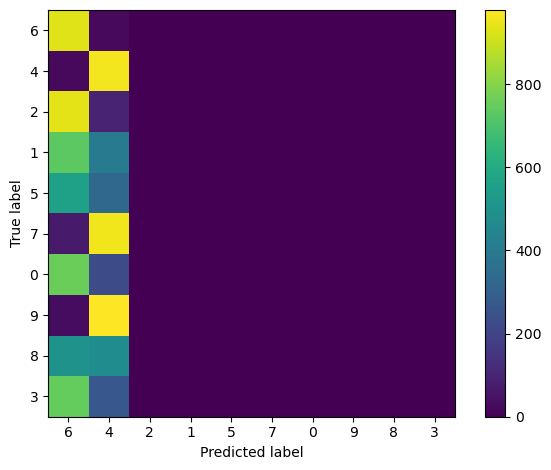

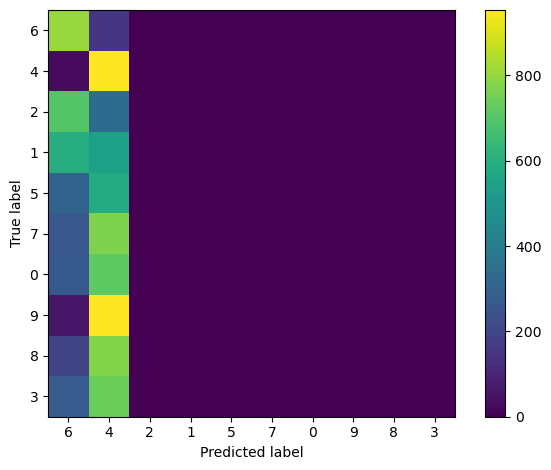

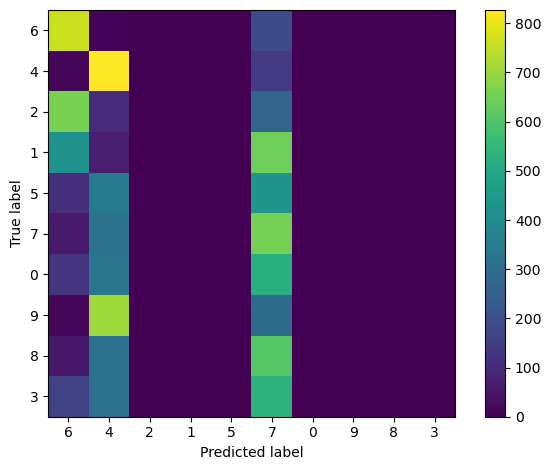

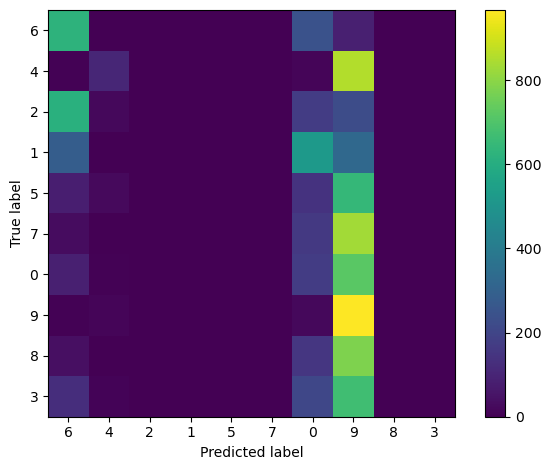

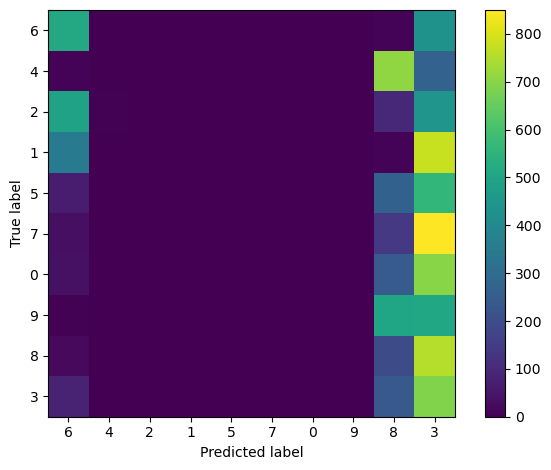

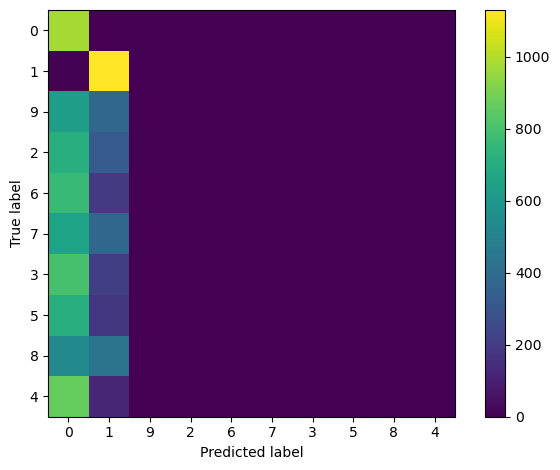

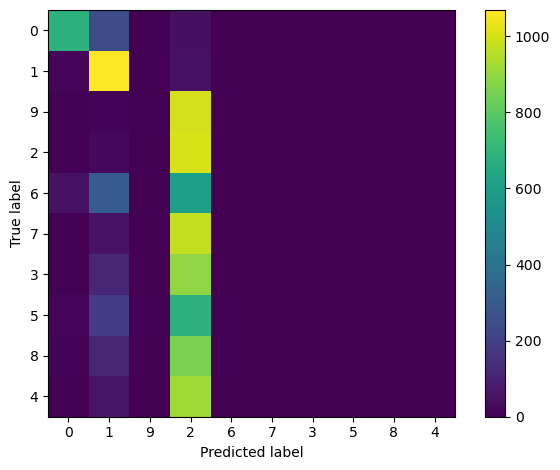

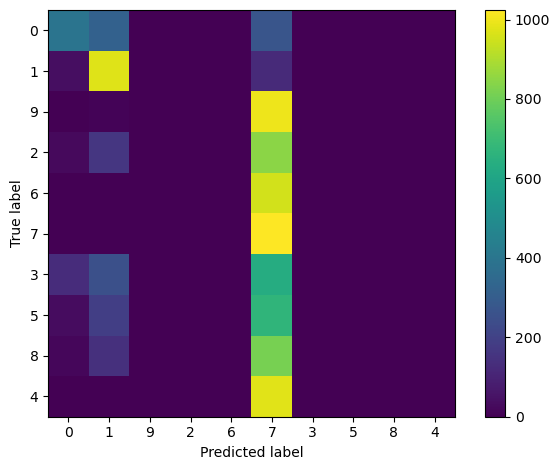

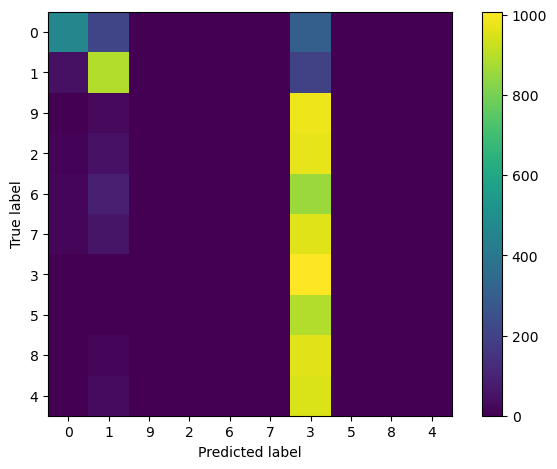

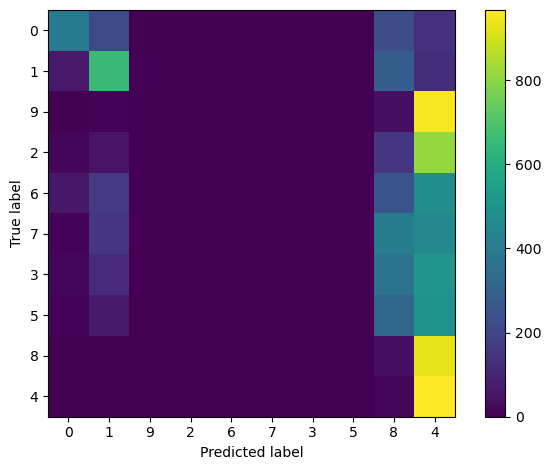

In [ ]:
import pickle

def load_pickle(file_path):
    """
    Load a pickle file and return the object contained within it.

    :param file_path: Path to the pickle file.
    :return: The object loaded from the pickle file.
    """
    try:
        with open(file_path, 'rb') as file:
            return pickle.load(file)
    except Exception as e:
        print(f"Error loading pickle file: {e}")
        return None
    
file_1 = '/home/yangz2/code/quantum_cl/results/list/splitminist_ER_qbit10_qdepth1.pkl'
file_2 = '/home/yangz2/code/quantum_cl/results/list/splitmnist_er_s2_qbit10_qdepth4_tepoch20.pkl'
file_3 = '/home/yangz2/code/quantum_cl/results/list/splitmnist_er_ours_3_qbit10_qdepth3_tepoch20.pkl'

result1 = load_pickle(file_1)[0]
result2 = load_pickle(file_2)
result3 = load_pickle(file_3)
print('result1:', result1)
print('result2:', result2)
print('result3:', result3)


/tmp/ipykernel_158237/3468747725.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Methods', fontsize=12, loc='upper right')


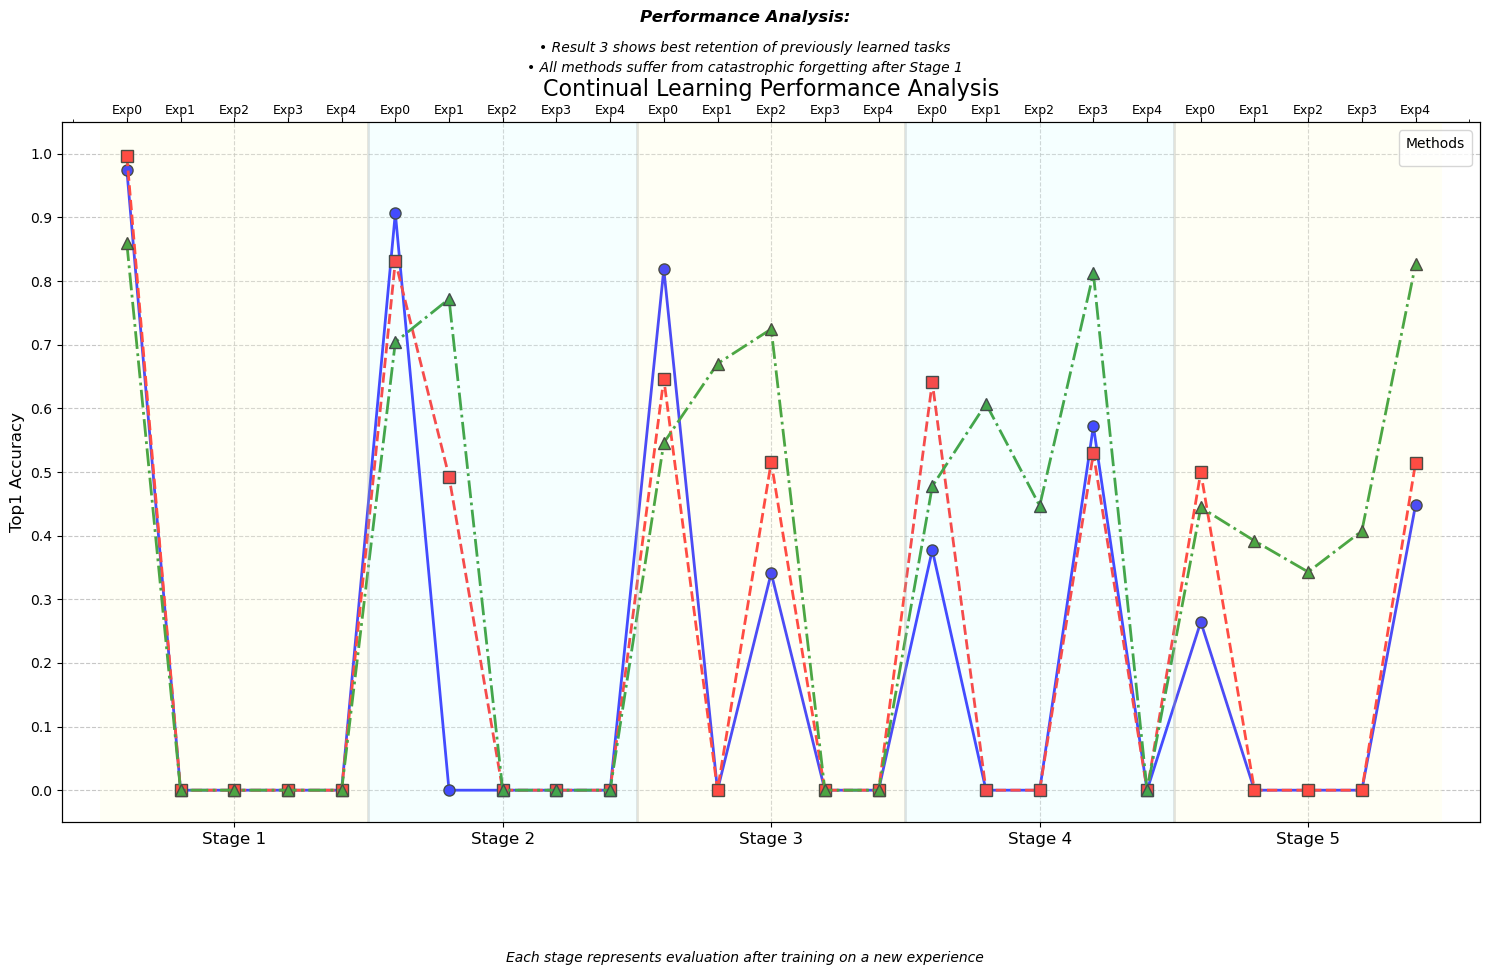

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

num_exp = 5
# 准备数据提取函数
def extract_exp_accuracies(result_list):
    """从结果列表中提取所有Exp的Top1准确率，按训练阶段组织"""
    num_stages = len(result_list)
    all_accs = []  # 存储所有阶段的准确率
    
    for stage_idx, stage_data in enumerate(result_list):
        stage_accs = []
        for exp_idx in range(num_exp):  # 提取5个Exp的准确率
            key = f'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{exp_idx}'
            if key in stage_data:
                stage_accs.append(stage_data[key])
            else:
                # 如果键不存在，使用上一个阶段的值或0
                prev_value = all_accs[-1][exp_idx] if all_accs and len(all_accs[-1]) > exp_idx else 0
                stage_accs.append(prev_value)
        all_accs.append(stage_accs)
    
    return all_accs

# 从三个结果中提取数据
result1_accs = extract_exp_accuracies(result1)
result2_accs = extract_exp_accuracies(result2)
result3_accs = extract_exp_accuracies(result3)

# 创建图表
plt.figure(figsize=(15, 10))
plt.title('Continual Learning Performance Analysis', fontsize=16)
plt.ylabel('Top1 Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 将数据展平为一维数组
result1_flat = [acc for stage in result1_accs for acc in stage]
result2_flat = [acc for stage in result2_accs for acc in stage]
result3_flat = [acc for stage in result3_accs for acc in stage]

# 绘制三条折线 - 使用不同的线型和标记
x = np.arange(len(result1_flat))
plt.plot(x, result1_flat, 'b-', linewidth=2, marker='o', markersize=8, 
         markerfacecolor='blue', markeredgecolor='black', label='Result 1')
plt.plot(x, result2_flat, 'r--', linewidth=2, marker='s', markersize=8, 
         markerfacecolor='red', markeredgecolor='black', label='Result 2')
plt.plot(x, result3_flat, 'g-.', linewidth=2, marker='^', markersize=8, 
         markerfacecolor='green', markeredgecolor='black', label='Result 3')

# 添加阶段分隔线
for stage in range(1, len(result1)):
    plt.axvline(x=stage*num_exp-0.5, color='gray', linestyle='-', alpha=0.3, linewidth=2)

# 设置Y轴
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(-0.05, 1.05)

# 创建双X轴显示
ax = plt.gca()

# 上方X轴：显示Exp标签
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(x)
ax_top.set_xticklabels([f'Exp{exp}' for exp in range(num_exp)] * len(result1))
ax_top.tick_params(axis='x', which='major', labelsize=9, pad=0)
ax_top.xaxis.set_minor_locator(MultipleLocator(1))

# 下方X轴：显示Stage标签
ax.set_xticks([i*num_exp + num_exp/2 - 0.5 for i in range(len(result1))])
ax.set_xticklabels([f'Stage {i+1}' for i in range(len(result1))], fontsize=12)

# 添加网格线和背景色以区分阶段
for stage in range(len(result1)):
    start = stage * num_exp
    end = (stage + 1) * num_exp
    color = 'lightyellow' if stage % 2 == 0 else 'lightcyan'
    plt.axvspan(start-0.5, end-0.5, facecolor=color, alpha=0.3)

# 添加图例和说明
plt.legend(title='Methods', fontsize=12, loc='upper right')
plt.figtext(0.5, 0.01, 'Each stage represents evaluation after training on a new experience', 
            ha='center', fontsize=10, style='italic')

# 添加性能分析注释
plt.figtext(0.5, 0.95, 'Performance Analysis:',
            ha='center', fontsize=12, style='italic', weight='bold')
plt.figtext(0.5, 0.92, '• Result 3 shows best retention of previously learned tasks',
            ha='center', fontsize=10, style='italic')
plt.figtext(0.5, 0.90, '• All methods suffer from catastrophic forgetting after Stage 1',
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15)  # 调整顶部和底部空间
plt.show()